In [1]:
from pkg.query_objects import ProteinDataset
from pkg.query_objects import Protein
from pkg.fac_clustering import ClusteredData
from pkg.nmf_models import NMF_model
from pkg.nmf_models import JNMF_model
from pkg.k_search_nmf import nmf_sigs

import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform
import seaborn as sns
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
import pickle
with open('...', 'rb') as input_file:
    plasma_df = pickle.load(input_file)
print(len(plasma_df.proteins))

658


In [3]:
x = ClusteredData([pd.DataFrame(data=plasma_df.values, index=plasma_df.samples, columns=plasma_df.measures).T], similarity_metric='cosine', hierarchy_method='ward')

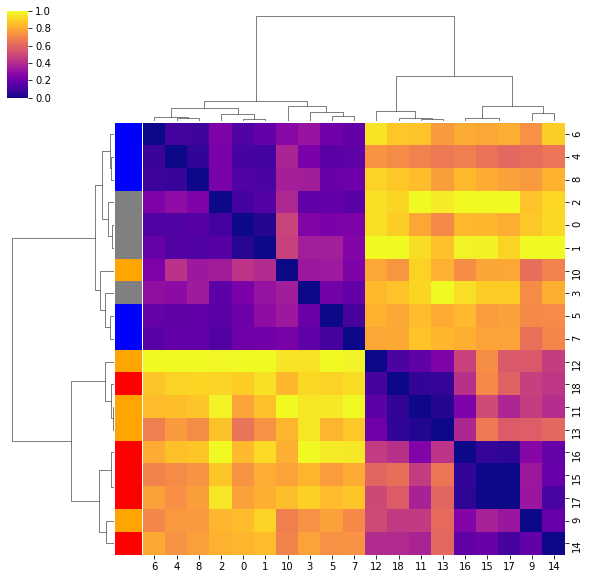

In [4]:
sns_plt = sns.clustermap(squareform(x.group_dist), cmap='plasma', 
               row_linkage=x.group_cluster, 
               col_linkage=x.group_cluster, 
               standard_scale=1.0, 
               row_colors=['grey','grey','grey','grey', 
                           'blue','blue','blue','blue','blue',
                           'orange','orange','orange','orange','orange',
                           'red','red','red','red','red'])
plt.show()

In [11]:
models = nmf_sigs(x, 2, 10, 10, 200, 1e-4, 4000, 'cosine', 'ward')

k = 2
num trials = 11
avg corr = 0.9728216022660324
avg error = 139.1114831630049

k = 3
num trials = 162
avg corr = 0.8441139149307018
avg error = 120.58721610566155

k = 4
num trials = 200
avg corr = 0.6665306172492323
avg error = 108.27948739019583

k = 5
num trials = 200
avg corr = 0.6701227907857177
avg error = 100.6260297719551

k = 6
num trials = 200
avg corr = 0.7155312137262994
avg error = 94.50107596810253

k = 7
num trials = 200
avg corr = 0.7418806292740711
avg error = 88.00795523201367

k = 8
num trials = 200
avg corr = 0.7303980065543275
avg error = 81.1700679694174

k = 9
num trials = 200
avg corr = 0.7168285505435702
avg error = 74.51539340590209

k = 10
num trials = 200
avg corr = 0.7531273944111314
avg error = 69.2876190941543



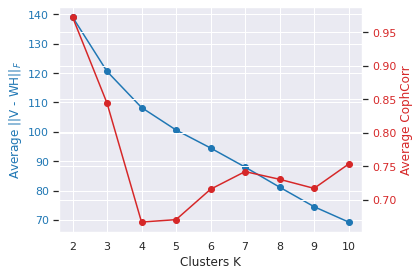

In [12]:
import seaborn as sns; sns.set()
ks = []
corrs = []
errors = []
for key, value in models.items():
    k = key
    corr = np.average([i[0] for i in value])
    error = np.average([i[1] for i in value])
    ks.append(k)
    corrs.append(corr)
    errors.append(error)

    
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Clusters K')
ax1.set_ylabel('Average ||V - WH||$_{F}$', color=color)
ax1.plot(ks, errors, 'o-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Average CophCorr', color=color)  # we already handled the x-label with ax1
ax2.plot(ks, corrs, 'o-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [13]:
top_model = sorted(models[3], key=lambda x:x[0], reverse=True)[0][2]

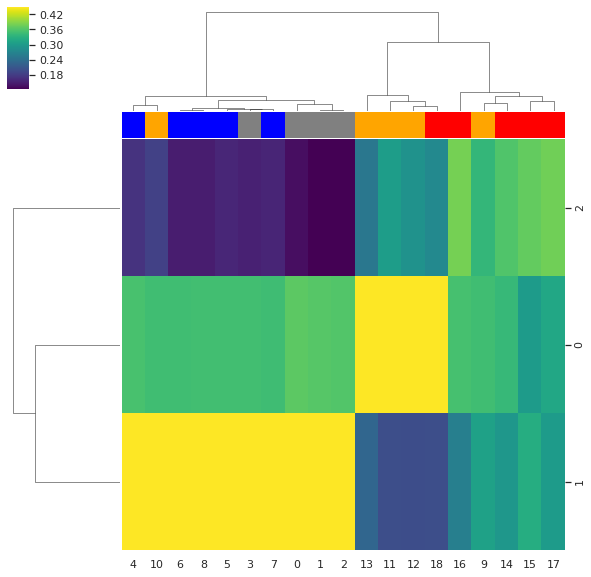

In [14]:
sns.clustermap(top_model.w.T,  cmap='viridis', col_cluster=True, row_cluster=True, col_colors=['grey','grey','grey','grey', 
                           'blue','blue','blue','blue','blue',
                           'orange','orange','orange','orange','orange',
                           'red','red','red','red','red'], vmax=.45)
plt.show()

In [15]:
h_df = pd.DataFrame(columns=top_model.variables, data=top_model.h)
h_df.head()

,Q9D6Y9,P62259,P61982,P63101,Q8BH00,P52760,Q8BWT1,P10852,Q9DCU9,P49429,...,P01635,F6Z9B9,Q08ED5,Q6AW46,Q6PDB7,Q8BK48,Q8QZR3,Q91WG0,Q921I1,Q9DBB8
0,22.127427,26.663632,25.102002,27.594842,21.536722,29.325352,4.951259e-09,20.073040,9.295340,26.978020,...,17.579330,14.664549,14.664549,14.664549,14.664549,14.664549,14.664549,14.664549,19.915467,24.672343
1,9.345784,6.638598,8.887818,5.922398,3.444043,4.363888,1.458539e+01,17.009092,13.981047,3.268414,...,17.149881,19.434710,19.434710,19.434710,19.434710,19.434710,19.434710,19.434710,24.701770,5.112996
2,15.530228,11.346361,8.804913,11.543261,36.046292,9.626977,4.491959e+01,10.659860,24.602407,23.758496,...,16.568664,17.334319,17.334319,17.334319,17.334319,17.334319,17.334319,17.334319,24.787004,22.958407


In [16]:
w_df = pd.DataFrame(index=top_model.samples, data=top_model.w)
w_df.head()

,0,1,2
Plasma 0h_1,0.367746,0.496140,0.136114
Plasma 0h_2,0.363789,0.511436,0.124775
Plasma 0h_3,0.362140,0.513363,0.124497
Plasma 0h_4,0.351701,0.493765,0.154535
Plasma 6h_1,0.354787,0.472855,0.172358
